## Analise Exploratoria de Dados com Pandas

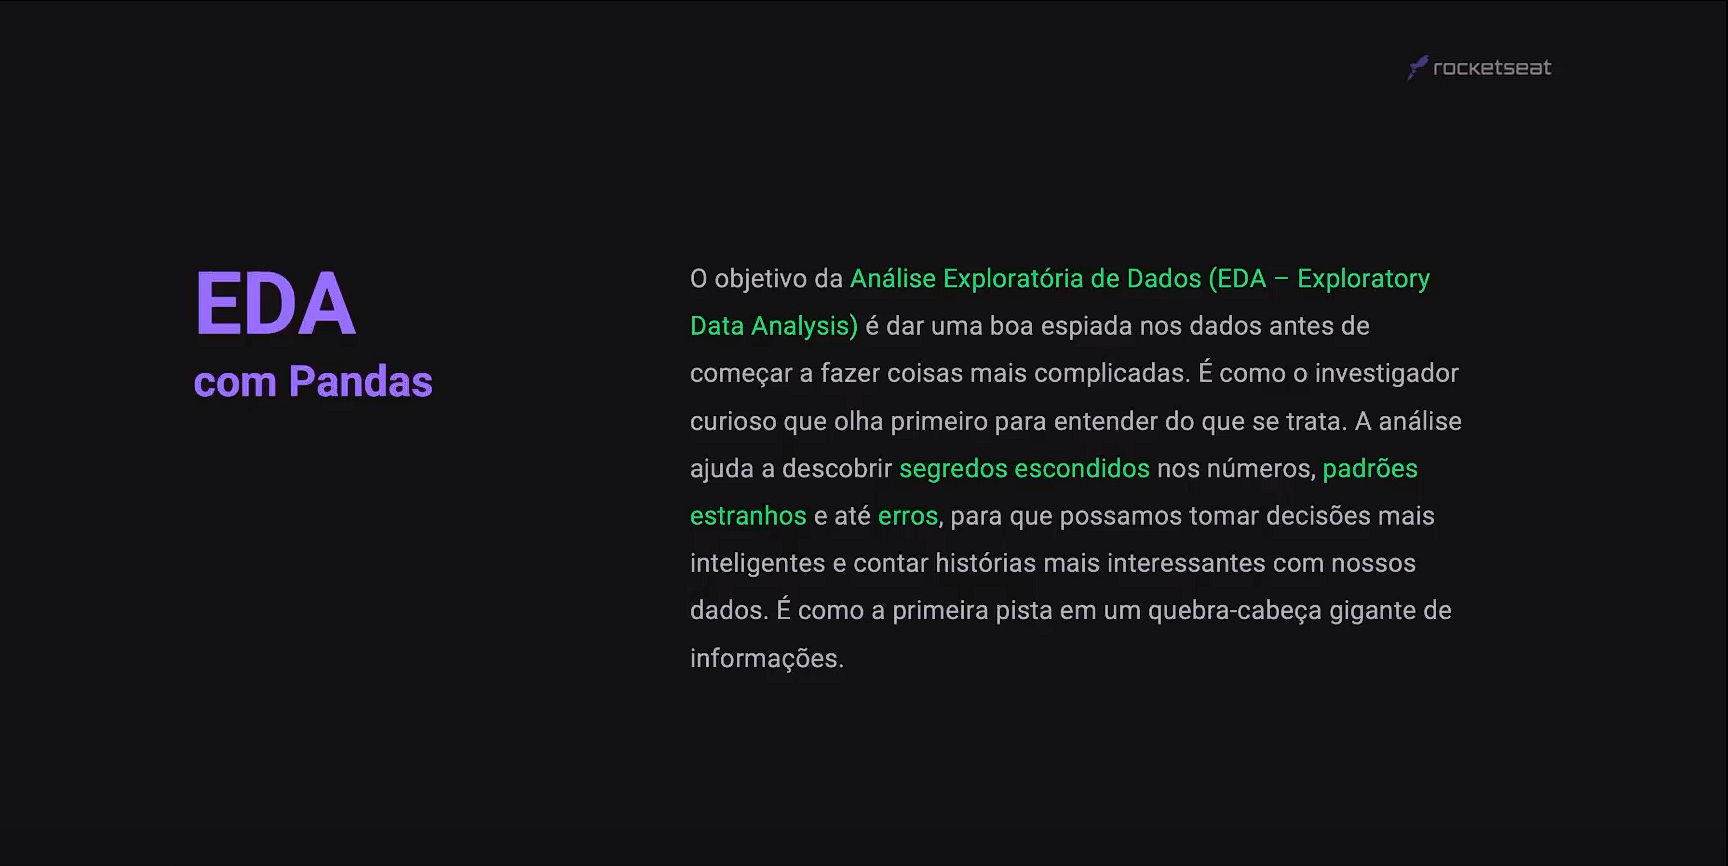

### Contexto do nosso problema 


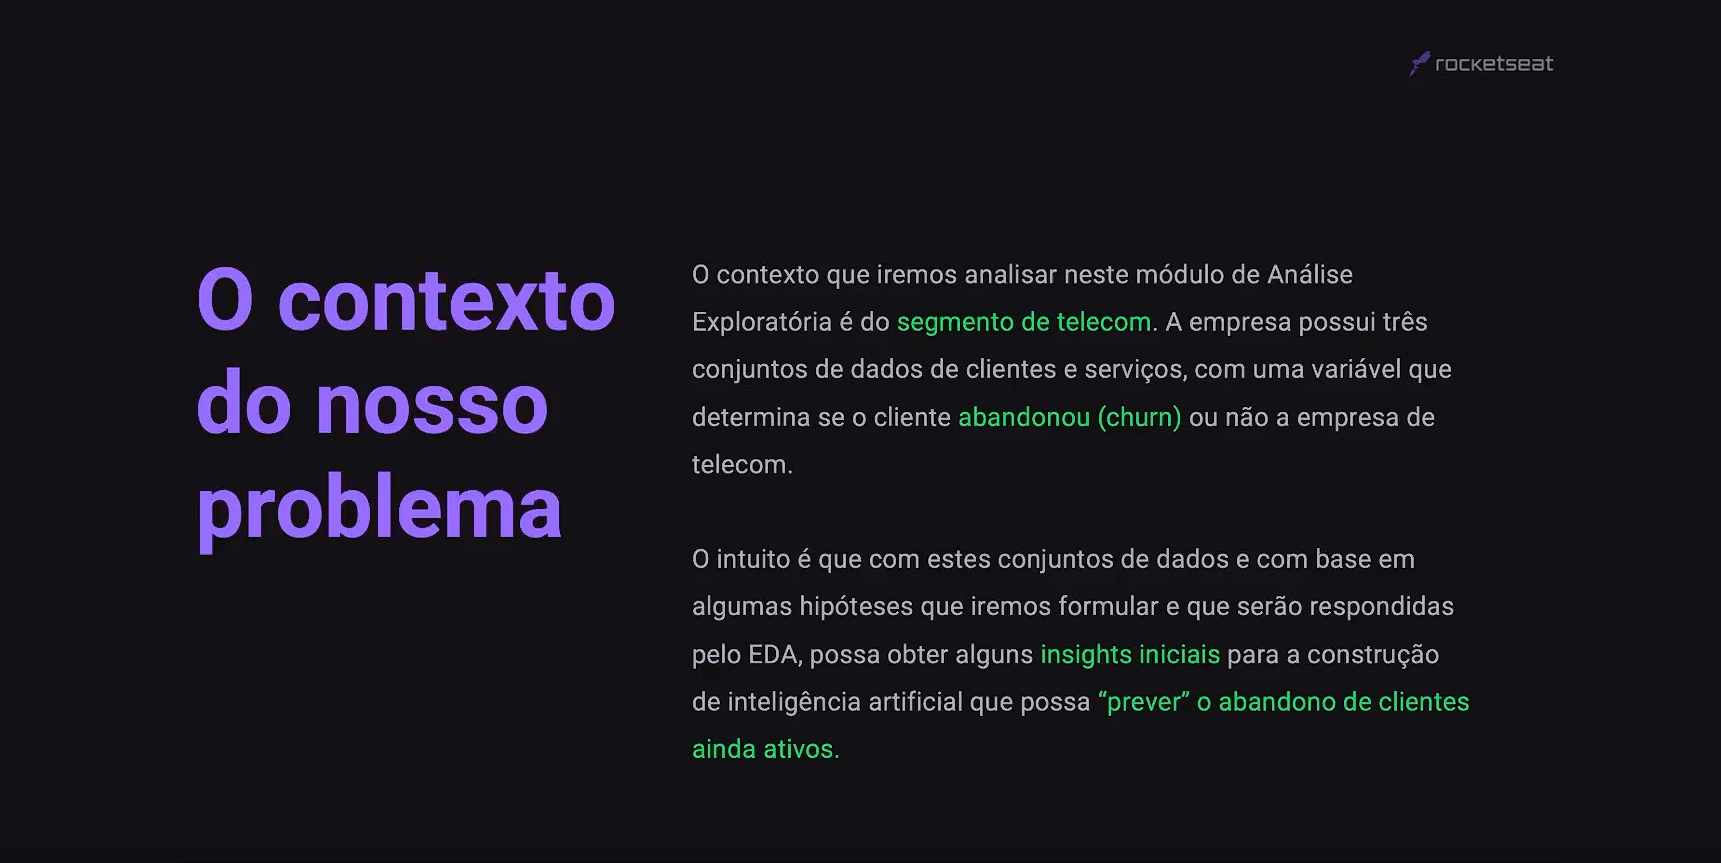

In [2]:
#importing csv data into variables
import matplotlib.pyplot as plt 
import pandas as pd

contracts = pd.read_csv("churn_contracts.csv")
costumers = pd.read_csv("churn_customers.csv")
services = pd.read_csv("churn_services.csv")

#creating dataframes for each database

df_contracts = pd.DataFrame(contracts)
df_costumers = pd.DataFrame(costumers)
df_services = pd.DataFrame(services)


In [3]:
#displaying first 5 rows of each database

df_contracts.head()

customerID  tenure        Contract PaperlessBilling  \
0  7590-VHVEG       1  Month-to-month              Yes   
1  5575-GNVDE      34        One year               No   
2  3668-QPYBK       2  Month-to-month              Yes   
3  7795-CFOCW      45        One year               No   
4  9237-HQITU       2  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0           Electronic check           29.85        29.85    No  
1               Mailed check           56.95       1889.5    No  
2               Mailed check           53.85       108.15   Yes  
3  Bank transfer (automatic)           42.30      1840.75    No  
4           Electronic check           70.70       151.65   Yes

In [4]:
#dataframe information
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


In [5]:
#displaying first 5 rows of each database
df_costumers.head()

customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

In [6]:
#dataframe information
df_costumers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [7]:
#displaying first 5 rows of each database
df_services.head() #tail() mostra as 5 ultimas linhas

customerID PhoneService     MultipleLines InternetService OnlineSecurity  \
0  7590-VHVEG           No  No phone service             DSL             No   
1  5575-GNVDE          Yes                No             DSL            Yes   
2  3668-QPYBK          Yes                No             DSL            Yes   
3  7795-CFOCW           No  No phone service             DSL            Yes   
4  9237-HQITU          Yes                No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  
0          Yes               No          No          No              No  
1           No              Yes          No          No              No  
2          Yes               No          No          No              No  
3           No              Yes         Yes          No              No  
4           No               No          No          No              No

In [8]:
#dataframe information
df_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   PhoneService      7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   DeviceProtection  7043 non-null   object
 7   TechSupport       7043 non-null   object
 8   StreamingTV       7043 non-null   object
 9   StreamingMovies   7043 non-null   object
dtypes: object(10)
memory usage: 550.4+ KB


## Transformação de Dados

In [9]:
#data conversion
#trasformar coluna total charges de STR > Float

df_contracts.TotalCharges = df_contracts.TotalCharges.astype(float)
#resulta em um erro pois alguma linha esta com espaço vazio


ValueError: could not convert string to float: ' '

In [ ]:
#tranformar coluna TotalCharges de String para float - Abordagem 2 (to_numeric)

df_contracts.TotalCharges = pd.to_numeric(df_contracts.TotalCharges)
#resulta no mesmo erro

ValueError: Unable to parse string " " at position 488

In [10]:
#Transformar coluna TotalCharges de String para Float com (to_numeric com coerce)

df_contracts.TotalCharges = pd.to_numeric(df_contracts.TotalCharges, errors='coerce')
#errors= "coerse" transforma dados que ele nao consegue converter em dados nulos, resolvendo nosso problema

In [11]:
#validando se ele realmente mudou o tipo de dado
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


apos a tranformação da coluna total charges do TotalCharges do DataFrame Contracts, a coluna passou a ter 11 valores ausentes(Missing Values)

## Renomear Colunas 

In [12]:
df_costumers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [13]:
#Renomear coluna em dataframe usando rename e Dict
df_costumers.rename(columns={'SeniorCitizen': 'Above65yo'})
#a estrutura nao muda desssa forma, apenas visualmnte

customerID  gender  Above65yo Partner Dependents
0     7590-VHVEG  Female          0     Yes         No
1     5575-GNVDE    Male          0      No         No
2     3668-QPYBK    Male          0      No         No
3     7795-CFOCW    Male          0      No         No
4     9237-HQITU  Female          0      No         No
...          ...     ...        ...     ...        ...
7038  6840-RESVB    Male          0     Yes        Yes
7039  2234-XADUH  Female          0     Yes        Yes
7040  4801-JZAZL  Female          0     Yes        Yes
7041  8361-LTMKD    Male          1     Yes         No
7042  3186-AJIEK    Male          0      No         No

[7043 rows x 5 columns]

In [14]:
#criar um DataFrame novo com base nas colunas renomeadas
df_costumers_renamed = df_costumers.rename(columns={'SeniorCitizen': 'Above65yo'})
df_costumers_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   gender      7043 non-null   object
 2   Above65yo   7043 non-null   int64 
 3   Partner     7043 non-null   object
 4   Dependents  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [15]:
#Aplicar o resultado do rename no proprio DataFrame (inpplace=)
df_costumers_renamed = df_costumers.rename(columns={'SeniorCitizen': 'Above65yo'}, inplace=True)
#visualizar estrurura
df_costumers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   gender      7043 non-null   object
 2   Above65yo   7043 non-null   int64 
 3   Partner     7043 non-null   object
 4   Dependents  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [16]:
#Rename usando lista - Modificar todos os nomes e colunas 
df_costumers.columns = ['IDCliente', 'Genero','Mais65anos','Casado','TemDependentes'] #columns recebe uma lista
df_costumers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IDCliente       7043 non-null   object
 1   Genero          7043 non-null   object
 2   Mais65anos      7043 non-null   int64 
 3   Casado          7043 non-null   object
 4   TemDependentes  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


## Unificando DataFrames de Costumers, Service e Contracts

In [17]:
#contar qtd de registros por DataFrame
len(df_contracts)

7043

In [18]:
len(df_services)

7043

In [19]:
len(df_costumers)

7043

In [20]:
#renomear as colunas que tem nomes diferentes
df_services.rename(columns={'customerID': 'IDCliente'}, inplace=True)
df_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IDCliente         7043 non-null   object
 1   PhoneService      7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   DeviceProtection  7043 non-null   object
 7   TechSupport       7043 non-null   object
 8   StreamingTV       7043 non-null   object
 9   StreamingMovies   7043 non-null   object
dtypes: object(10)
memory usage: 550.4+ KB


In [21]:
#Unificar dataframe de costumers com services, criando um terceiro dataframe
df_temp = df_costumers.merge(df_services, on=['IDCliente'])
#mostrar estrutura do dataframe
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IDCliente         7043 non-null   object
 1   Genero            7043 non-null   object
 2   Mais65anos        7043 non-null   int64 
 3   Casado            7043 non-null   object
 4   TemDependentes    7043 non-null   object
 5   PhoneService      7043 non-null   object
 6   MultipleLines     7043 non-null   object
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   object
 11  TechSupport       7043 non-null   object
 12  StreamingTV       7043 non-null   object
 13  StreamingMovies   7043 non-null   object
dtypes: int64(1), object(13)
memory usage: 770.5+ KB


In [22]:
df_temp.head()

IDCliente  Genero  Mais65anos Casado TemDependentes PhoneService  \
0  7590-VHVEG  Female           0    Yes             No           No   
1  5575-GNVDE    Male           0     No             No          Yes   
2  3668-QPYBK    Male           0     No             No          Yes   
3  7795-CFOCW    Male           0     No             No           No   
4  9237-HQITU  Female           0     No             No          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies  
0               No          No          No              No  
1              Yes          No          No              No  
2               No          No          No              No  
3              Yes         Yes          No              No  
4               No          No          No              No

In [23]:
#unificando df_temp com Contracts, usando colunas de junção com nomes distintos
df_churn_temp = df_temp.merge(df_contracts, left_on=['IDCliente'], right_on=['customerID'])
df_churn_temp.info() #depois temos que dropar a coluna customerID(duplicada)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   Casado            7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  customerID        7043 non-null   object 
 15  tenure            7043 non-null   int64  
 16  Contract          7043 non-null   object 


In [24]:
#unificar os 3 dataframes ao mesmo tempo com colunas de nomes diferentes
df_churn = df_costumers.merge(df_services, on=['IDCliente']).merge(df_contracts, left_on=['IDCliente'], right_on=['customerID'])


In [25]:
#apagando coluna 'costumeID' com metodo drop, inplace para fazer a atualização do dataframe
#axis representa o eixo que estamos apgando, 0 = linha, 1 = coluna 
df_churn.drop(['customerID'], axis=1, inplace=True)


In [26]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   Casado            7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


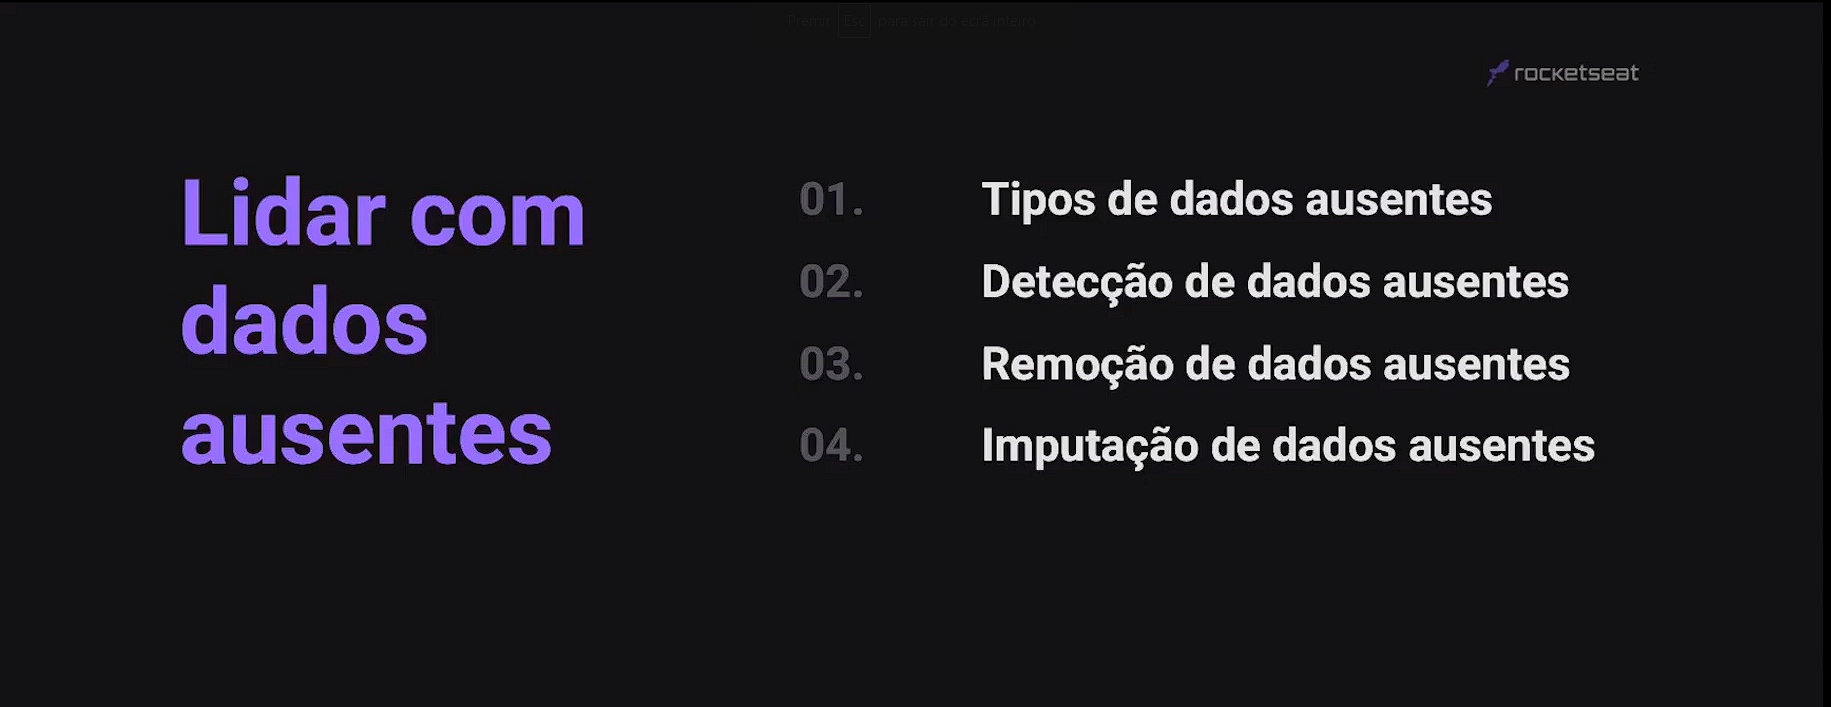

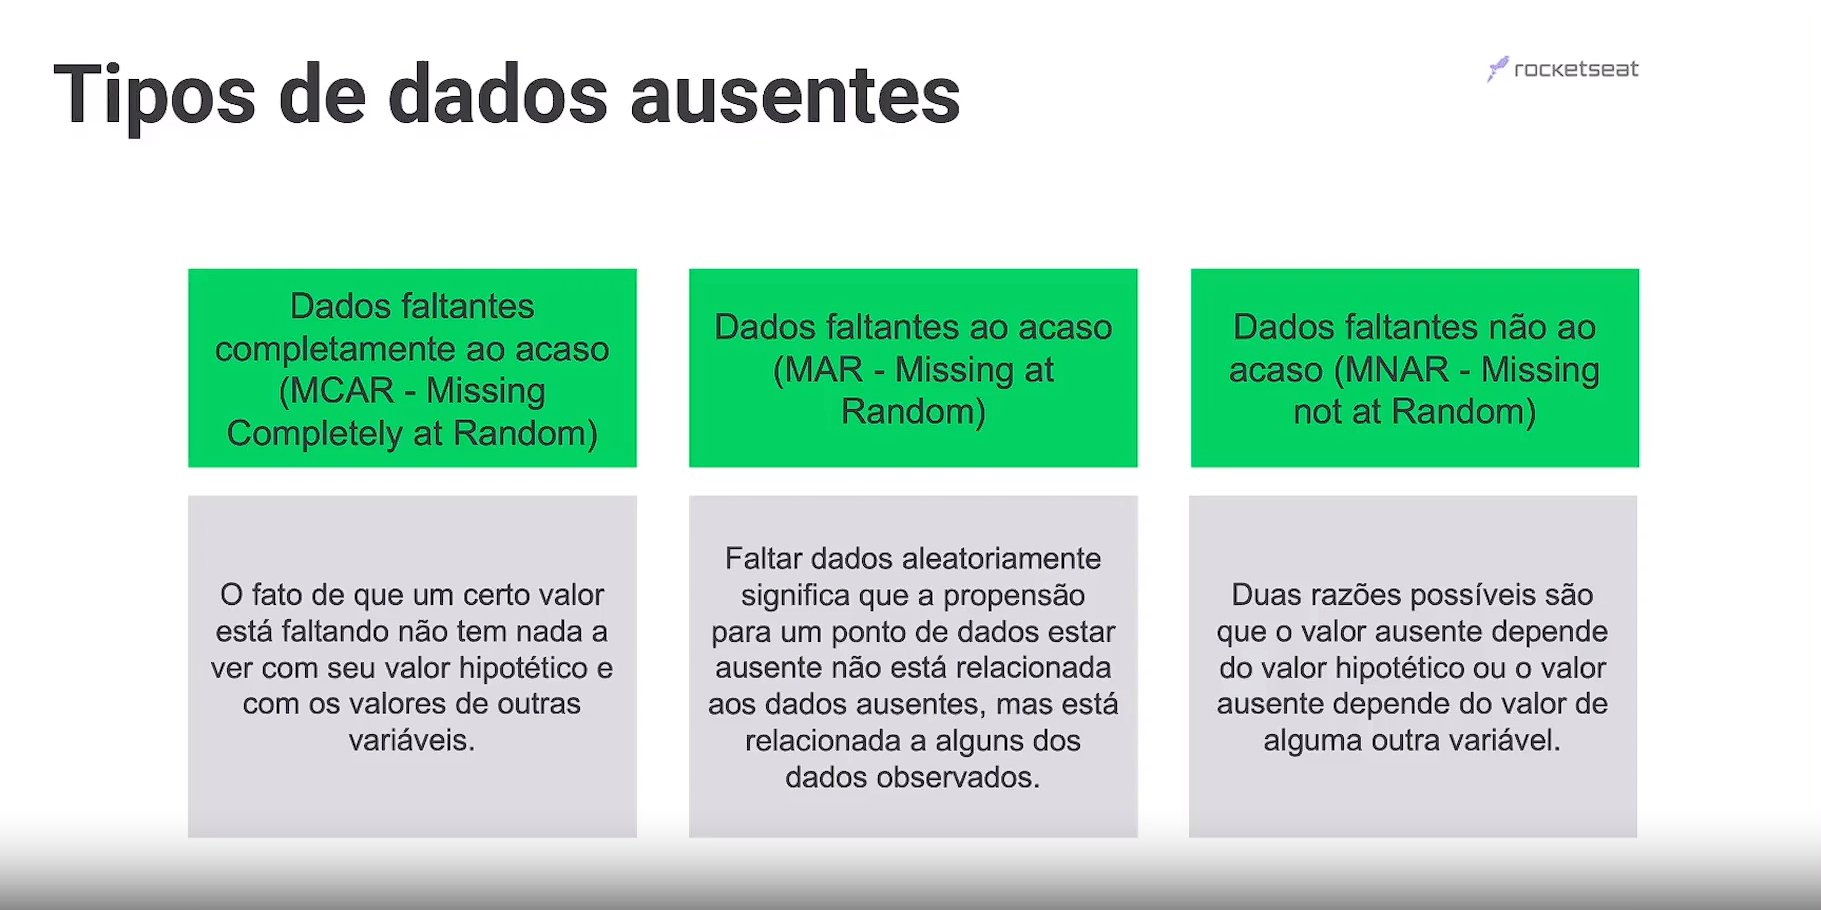

## Como detectar dados ausentes

In [27]:
#Detectar valores ausentes em todas as colunas de um Dataset ou um Dataframe
df_churn.isna().sum() #usando 2 funções, isna() = mostra de ha valores ausentes em todo Dataset + sum() = somalos



IDCliente            0
Genero               0
Mais65anos           0
Casado               0
TemDependentes       0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
#identificar valores ausentes em uma coluna especifica
df_churn.TotalCharges.isna().sum()

np.int64(11)

In [29]:
#Detectar quantas linhas tem pelo menos uma valor ausente 
df_churn[df_churn.isna().any(axis=1)] #usando formula, isna() + any(axis=1)"qualquer coluna"

IDCliente  Genero  Mais65anos Casado TemDependentes PhoneService  \
488   4472-LVYGI  Female           0    Yes            Yes           No   
753   3115-CZMZD    Male           0     No            Yes          Yes   
936   5709-LVOEQ  Female           0    Yes            Yes          Yes   
1082  4367-NUYAO    Male           0    Yes            Yes          Yes   
1340  1371-DWPAZ  Female           0    Yes            Yes           No   
3331  7644-OMVMY    Male           0    Yes            Yes          Yes   
3826  3213-VVOLG    Male           0    Yes            Yes          Yes   
4380  2520-SGTTA  Female           0    Yes            Yes          Yes   
5218  2923-ARZLG    Male           0    Yes            Yes          Yes   
6670  4075-WKNIU  Female           0    Yes            Yes          Yes   
6754  2775-SEFEE    Male           0     No            Yes          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup  ...          TechSupport          StreamingTV  \
488                    No  ...                  Yes                  Yes   
753   No internet service  ...  No internet service  No internet service   
936                   Yes  ...                   No                  Yes   
1082  No internet service  ...  No internet service  No internet service   
1340                  Yes  ...                  Yes                  Yes   
3331  No internet service  ...  No internet service  No internet service   
3826  No internet service  ...  No internet service  No internet service   
4380  No internet service  ...  No internet service  No internet service   
5218  No internet service  ...  No internet service  No internet service   
6670                  Yes  ...                  Yes                  Yes   
6754                  Yes  ...                  Yes                   No   

          StreamingMovies tenure  Contract PaperlessBilling  \
488                    No      0  Two year              Yes   
753   No internet service      0  Two year               No   
936                   Yes      0  Two year               No   
1082  No internet service      0  Two year               No   
1340                   No      0  Two year               No   
3331  No internet service      0  Two year               No   
3826  No internet service      0  Two year               No   
4380  No internet service      0  Two year               No   
5218  No internet service      0  One year              Yes   
6670                   No      0  Two year               No   
6754                   No      0  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check          19.70   

In [30]:
#detectar quantas colunas tem pelo menos um valor ausente
df_churn.isna().any(axis=0).sum() #especidicamos que sera feito na linha com axis=0 e somamos qunatas colunas tem pelo menos 1 valor ausente com sum()

np.int64(1)

## Como lidar com Valores Ausentes 

In [31]:
#remover de forma direta a coluna que possui valores ausentes
df_churn.drop(columns=['TotalCharges'], axis=1) #sem inplace

IDCliente  Genero  Mais65anos Casado TemDependentes PhoneService  \
0     7590-VHVEG  Female           0    Yes             No           No   
1     5575-GNVDE    Male           0     No             No          Yes   
2     3668-QPYBK    Male           0     No             No          Yes   
3     7795-CFOCW    Male           0     No             No           No   
4     9237-HQITU  Female           0     No             No          Yes   
...          ...     ...         ...    ...            ...          ...   
7038  6840-RESVB    Male           0    Yes            Yes          Yes   
7039  2234-XADUH  Female           0    Yes            Yes          Yes   
7040  4801-JZAZL  Female           0    Yes            Yes           No   
7041  8361-LTMKD    Male           1    Yes             No          Yes   
7042  3186-AJIEK    Male           0     No             No          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies  tenure  \
0                  No          No          No              No       1   
1                 Yes          No          No              No      34   
2                  No          No          No              No       2   
3                 Yes         Yes          No              No      45   
4                  No          No          No              No       2   
...               ...         ...         ...             ...     ...   
7038              Yes         Yes         Yes             Yes      24   
7039              Yes          No         Yes             Yes      72   
7040               No          No          No              No      11   
7041               No          No          No              No       4   
7042              Yes         Yes         Yes             Yes      66   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges Churn  
0              29.85    No  
1              56.95    No  
2              53.85   Yes  
3              42.30    No  
4              70.70   Yes  
...              ...   ...  
7038           84.80    No  
7039          103.20    No  
7040           29.60    No  
7041           74.40   Yes  
7042          105.65    No  

[7043 rows x 20 columns]

In [32]:
#Remover colunas com valores ausentes
df_churn.dropna(axis=1) #metodo dropna() remove por completo onde tem valores ausentes junto a axis para especificar se deseja linha ou coluna


IDCliente  Genero  Mais65anos Casado TemDependentes PhoneService  \
0     7590-VHVEG  Female           0    Yes             No           No   
1     5575-GNVDE    Male           0     No             No          Yes   
2     3668-QPYBK    Male           0     No             No          Yes   
3     7795-CFOCW    Male           0     No             No           No   
4     9237-HQITU  Female           0     No             No          Yes   
...          ...     ...         ...    ...            ...          ...   
7038  6840-RESVB    Male           0    Yes            Yes          Yes   
7039  2234-XADUH  Female           0    Yes            Yes          Yes   
7040  4801-JZAZL  Female           0    Yes            Yes           No   
7041  8361-LTMKD    Male           1    Yes             No          Yes   
7042  3186-AJIEK    Male           0     No             No          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies  tenure  \
0                  No          No          No              No       1   
1                 Yes          No          No              No      34   
2                  No          No          No              No       2   
3                 Yes         Yes          No              No      45   
4                  No          No          No              No       2   
...               ...         ...         ...             ...     ...   
7038              Yes         Yes         Yes             Yes      24   
7039              Yes          No         Yes             Yes      72   
7040               No          No          No              No      11   
7041               No          No          No              No       4   
7042              Yes         Yes         Yes             Yes      66   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges Churn  
0              29.85    No  
1              56.95    No  
2              53.85   Yes  
3              42.30    No  
4              70.70   Yes  
...              ...   ...  
7038           84.80    No  
7039          103.20    No  
7040           29.60    No  
7041           74.40   Yes  
7042          105.65    No  

[7043 rows x 20 columns]

In [33]:
#metodo para remover totalmente coluna opu linha que for totalmente preenchida de valores nulos
df_churn.dropna(axis=1, how='all') #argumento how = 'all' faz com que remova apenas se todos os dados da coluna forem nulos

IDCliente  Genero  Mais65anos Casado TemDependentes PhoneService  \
0     7590-VHVEG  Female           0    Yes             No           No   
1     5575-GNVDE    Male           0     No             No          Yes   
2     3668-QPYBK    Male           0     No             No          Yes   
3     7795-CFOCW    Male           0     No             No           No   
4     9237-HQITU  Female           0     No             No          Yes   
...          ...     ...         ...    ...            ...          ...   
7038  6840-RESVB    Male           0    Yes            Yes          Yes   
7039  2234-XADUH  Female           0    Yes            Yes          Yes   
7040  4801-JZAZL  Female           0    Yes            Yes           No   
7041  8361-LTMKD    Male           1    Yes             No          Yes   
7042  3186-AJIEK    Male           0     No             No          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0     No phone service             DSL             No          Yes  ...   
1                   No             DSL            Yes           No  ...   
2                   No             DSL            Yes          Yes  ...   
3     No phone service             DSL            Yes           No  ...   
4                   No     Fiber optic             No           No  ...   
...                ...             ...            ...          ...  ...   
7038               Yes             DSL            Yes           No  ...   
7039               Yes     Fiber optic             No          Yes  ...   
7040  No phone service             DSL            Yes           No  ...   
7041               Yes     Fiber optic             No           No  ...   
7042                No     Fiber optic            Yes           No  ...   

     TechSupport StreamingTV StreamingMovies tenure        Contract  \
0             No          No              No      1  Month-to-month   
1             No          No              No     34        One year   
2             No          No              No      2  Month-to-month   
3            Yes          No              No     45        One year   
4             No          No              No      2  Month-to-month   
...          ...         ...             ...    ...             ...   
7038         Yes         Yes             Yes     24        One year   
7039          No         Yes             Yes     72        One year   
7040          No          No              No     11  Month-to-month   
7041          No          No              No      4  Month-to-month   
7042         Yes         Yes             Yes     66        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

In [34]:
#Remover linhas com dados nulos de um dataframe
df_churn.dropna(axis=0) #mudando axis para trabahar com linhas, sem inplace

IDCliente  Genero  Mais65anos Casado TemDependentes PhoneService  \
0     7590-VHVEG  Female           0    Yes             No           No   
1     5575-GNVDE    Male           0     No             No          Yes   
2     3668-QPYBK    Male           0     No             No          Yes   
3     7795-CFOCW    Male           0     No             No           No   
4     9237-HQITU  Female           0     No             No          Yes   
...          ...     ...         ...    ...            ...          ...   
7038  6840-RESVB    Male           0    Yes            Yes          Yes   
7039  2234-XADUH  Female           0    Yes            Yes          Yes   
7040  4801-JZAZL  Female           0    Yes            Yes           No   
7041  8361-LTMKD    Male           1    Yes             No          Yes   
7042  3186-AJIEK    Male           0     No             No          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0     No phone service             DSL             No          Yes  ...   
1                   No             DSL            Yes           No  ...   
2                   No             DSL            Yes          Yes  ...   
3     No phone service             DSL            Yes           No  ...   
4                   No     Fiber optic             No           No  ...   
...                ...             ...            ...          ...  ...   
7038               Yes             DSL            Yes           No  ...   
7039               Yes     Fiber optic             No          Yes  ...   
7040  No phone service             DSL            Yes           No  ...   
7041               Yes     Fiber optic             No           No  ...   
7042                No     Fiber optic            Yes           No  ...   

     TechSupport StreamingTV StreamingMovies tenure        Contract  \
0             No          No              No      1  Month-to-month   
1             No          No              No     34        One year   
2             No          No              No      2  Month-to-month   
3            Yes          No              No     45        One year   
4             No          No              No      2  Month-to-month   
...          ...         ...             ...    ...             ...   
7038         Yes         Yes             Yes     24        One year   
7039          No         Yes             Yes     72        One year   
7040          No          No              No     11  Month-to-month   
7041          No          No              No      4  Month-to-month   
7042         Yes         Yes             Yes     66        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7032 rows x 21 columns]

In [35]:
#remover linhas se e somente se todos os valores forem ausentes
df_churn.dropna(axis=0, how='all')

IDCliente  Genero  Mais65anos Casado TemDependentes PhoneService  \
0     7590-VHVEG  Female           0    Yes             No           No   
1     5575-GNVDE    Male           0     No             No          Yes   
2     3668-QPYBK    Male           0     No             No          Yes   
3     7795-CFOCW    Male           0     No             No           No   
4     9237-HQITU  Female           0     No             No          Yes   
...          ...     ...         ...    ...            ...          ...   
7038  6840-RESVB    Male           0    Yes            Yes          Yes   
7039  2234-XADUH  Female           0    Yes            Yes          Yes   
7040  4801-JZAZL  Female           0    Yes            Yes           No   
7041  8361-LTMKD    Male           1    Yes             No          Yes   
7042  3186-AJIEK    Male           0     No             No          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0     No phone service             DSL             No          Yes  ...   
1                   No             DSL            Yes           No  ...   
2                   No             DSL            Yes          Yes  ...   
3     No phone service             DSL            Yes           No  ...   
4                   No     Fiber optic             No           No  ...   
...                ...             ...            ...          ...  ...   
7038               Yes             DSL            Yes           No  ...   
7039               Yes     Fiber optic             No          Yes  ...   
7040  No phone service             DSL            Yes           No  ...   
7041               Yes     Fiber optic             No           No  ...   
7042                No     Fiber optic            Yes           No  ...   

     TechSupport StreamingTV StreamingMovies tenure        Contract  \
0             No          No              No      1  Month-to-month   
1             No          No              No     34        One year   
2             No          No              No      2  Month-to-month   
3            Yes          No              No     45        One year   
4             No          No              No      2  Month-to-month   
...          ...         ...             ...    ...             ...   
7038         Yes         Yes             Yes     24        One year   
7039          No         Yes             Yes     72        One year   
7040          No          No              No     11  Month-to-month   
7041          No          No              No      4  Month-to-month   
7042         Yes         Yes             Yes     66        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

## Como Inputar valores ausentes

In [36]:
#Prencher valores padrao conforme a coluna
df_churn.fillna(0) #colocando valor especifico

IDCliente  Genero  Mais65anos Casado TemDependentes PhoneService  \
0     7590-VHVEG  Female           0    Yes             No           No   
1     5575-GNVDE    Male           0     No             No          Yes   
2     3668-QPYBK    Male           0     No             No          Yes   
3     7795-CFOCW    Male           0     No             No           No   
4     9237-HQITU  Female           0     No             No          Yes   
...          ...     ...         ...    ...            ...          ...   
7038  6840-RESVB    Male           0    Yes            Yes          Yes   
7039  2234-XADUH  Female           0    Yes            Yes          Yes   
7040  4801-JZAZL  Female           0    Yes            Yes           No   
7041  8361-LTMKD    Male           1    Yes             No          Yes   
7042  3186-AJIEK    Male           0     No             No          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0     No phone service             DSL             No          Yes  ...   
1                   No             DSL            Yes           No  ...   
2                   No             DSL            Yes          Yes  ...   
3     No phone service             DSL            Yes           No  ...   
4                   No     Fiber optic             No           No  ...   
...                ...             ...            ...          ...  ...   
7038               Yes             DSL            Yes           No  ...   
7039               Yes     Fiber optic             No          Yes  ...   
7040  No phone service             DSL            Yes           No  ...   
7041               Yes     Fiber optic             No           No  ...   
7042                No     Fiber optic            Yes           No  ...   

     TechSupport StreamingTV StreamingMovies tenure        Contract  \
0             No          No              No      1  Month-to-month   
1             No          No              No     34        One year   
2             No          No              No      2  Month-to-month   
3            Yes          No              No     45        One year   
4             No          No              No      2  Month-to-month   
...          ...         ...             ...    ...             ...   
7038         Yes         Yes             Yes     24        One year   
7039          No         Yes             Yes     72        One year   
7040          No          No              No     11  Month-to-month   
7041          No          No              No      4  Month-to-month   
7042         Yes         Yes             Yes     66        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

In [37]:
#Substituir mais de uma coluna, se coloco um dicionario
df_churn.fillna(value={'TotalCharges': 0})

IDCliente  Genero  Mais65anos Casado TemDependentes PhoneService  \
0     7590-VHVEG  Female           0    Yes             No           No   
1     5575-GNVDE    Male           0     No             No          Yes   
2     3668-QPYBK    Male           0     No             No          Yes   
3     7795-CFOCW    Male           0     No             No           No   
4     9237-HQITU  Female           0     No             No          Yes   
...          ...     ...         ...    ...            ...          ...   
7038  6840-RESVB    Male           0    Yes            Yes          Yes   
7039  2234-XADUH  Female           0    Yes            Yes          Yes   
7040  4801-JZAZL  Female           0    Yes            Yes           No   
7041  8361-LTMKD    Male           1    Yes             No          Yes   
7042  3186-AJIEK    Male           0     No             No          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0     No phone service             DSL             No          Yes  ...   
1                   No             DSL            Yes           No  ...   
2                   No             DSL            Yes          Yes  ...   
3     No phone service             DSL            Yes           No  ...   
4                   No     Fiber optic             No           No  ...   
...                ...             ...            ...          ...  ...   
7038               Yes             DSL            Yes           No  ...   
7039               Yes     Fiber optic             No          Yes  ...   
7040  No phone service             DSL            Yes           No  ...   
7041               Yes     Fiber optic             No           No  ...   
7042                No     Fiber optic            Yes           No  ...   

     TechSupport StreamingTV StreamingMovies tenure        Contract  \
0             No          No              No      1  Month-to-month   
1             No          No              No     34        One year   
2             No          No              No      2  Month-to-month   
3            Yes          No              No     45        One year   
4             No          No              No      2  Month-to-month   
...          ...         ...             ...    ...             ...   
7038         Yes         Yes             Yes     24        One year   
7039          No         Yes             Yes     72        One year   
7040          No          No              No     11  Month-to-month   
7041          No          No              No      4  Month-to-month   
7042         Yes         Yes             Yes     66        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

In [38]:
media_TotalCharges = df_churn.TotalCharges.mean()
media_TotalCharges

np.float64(2283.3004408418656)

In [39]:
df_churn.fillna(value={'TotalCharges': media_TotalCharges})

IDCliente  Genero  Mais65anos Casado TemDependentes PhoneService  \
0     7590-VHVEG  Female           0    Yes             No           No   
1     5575-GNVDE    Male           0     No             No          Yes   
2     3668-QPYBK    Male           0     No             No          Yes   
3     7795-CFOCW    Male           0     No             No           No   
4     9237-HQITU  Female           0     No             No          Yes   
...          ...     ...         ...    ...            ...          ...   
7038  6840-RESVB    Male           0    Yes            Yes          Yes   
7039  2234-XADUH  Female           0    Yes            Yes          Yes   
7040  4801-JZAZL  Female           0    Yes            Yes           No   
7041  8361-LTMKD    Male           1    Yes             No          Yes   
7042  3186-AJIEK    Male           0     No             No          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0     No phone service             DSL             No          Yes  ...   
1                   No             DSL            Yes           No  ...   
2                   No             DSL            Yes          Yes  ...   
3     No phone service             DSL            Yes           No  ...   
4                   No     Fiber optic             No           No  ...   
...                ...             ...            ...          ...  ...   
7038               Yes             DSL            Yes           No  ...   
7039               Yes     Fiber optic             No          Yes  ...   
7040  No phone service             DSL            Yes           No  ...   
7041               Yes     Fiber optic             No           No  ...   
7042                No     Fiber optic            Yes           No  ...   

     TechSupport StreamingTV StreamingMovies tenure        Contract  \
0             No          No              No      1  Month-to-month   
1             No          No              No     34        One year   
2             No          No              No      2  Month-to-month   
3            Yes          No              No     45        One year   
4             No          No              No      2  Month-to-month   
...          ...         ...             ...    ...             ...   
7038         Yes         Yes             Yes     24        One year   
7039          No         Yes             Yes     72        One year   
7040          No          No              No     11  Month-to-month   
7041          No          No              No      4  Month-to-month   
7042         Yes         Yes             Yes     66        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

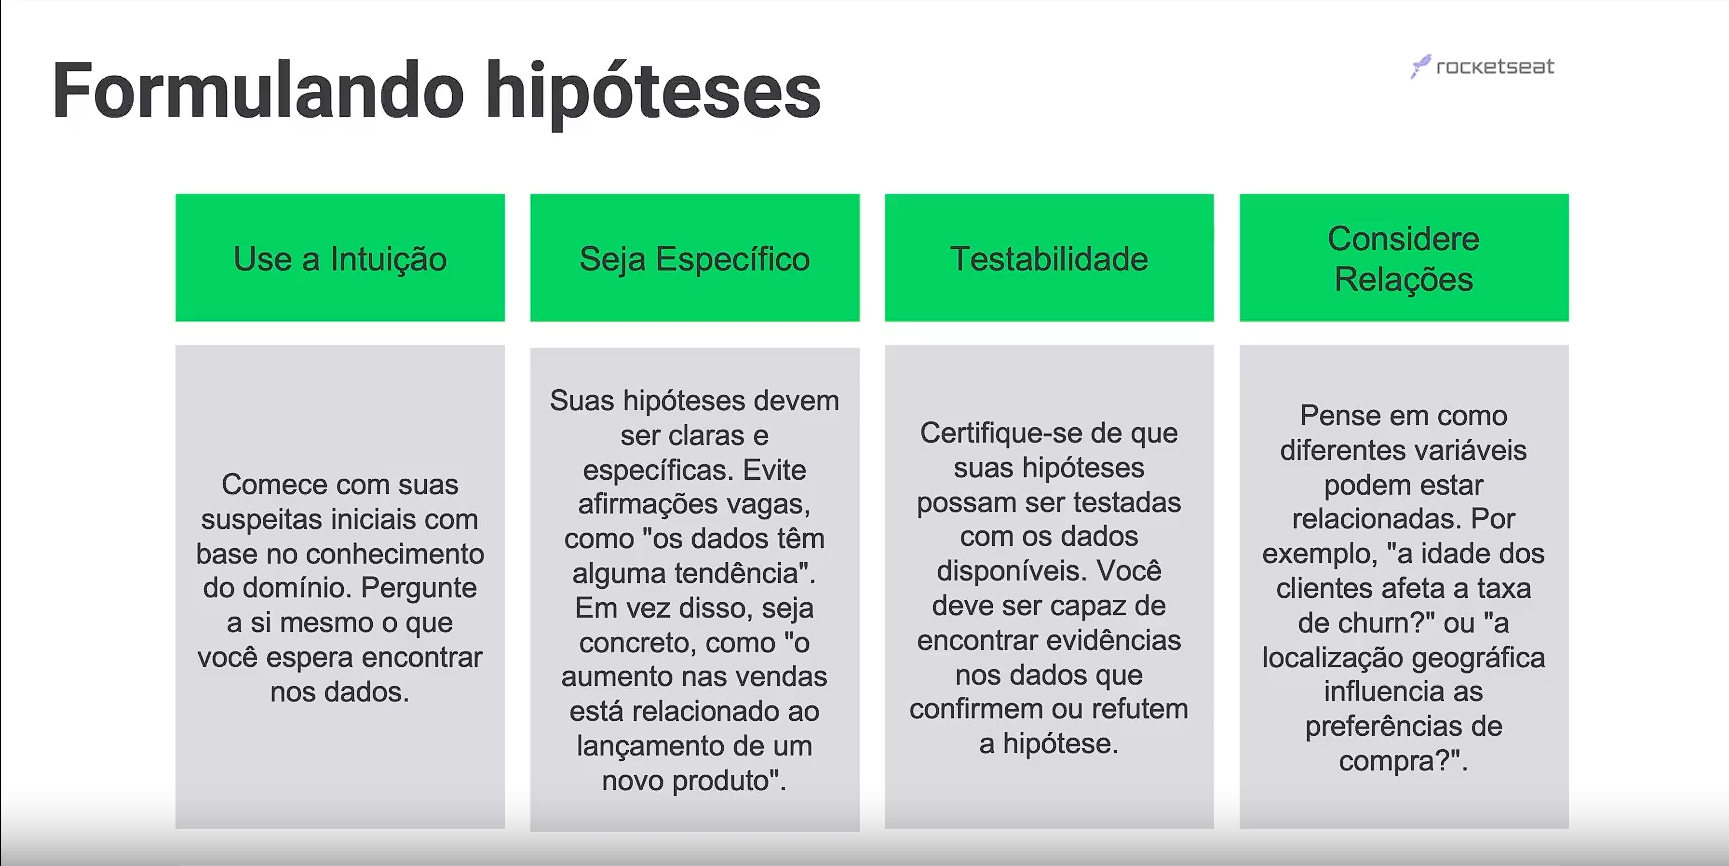

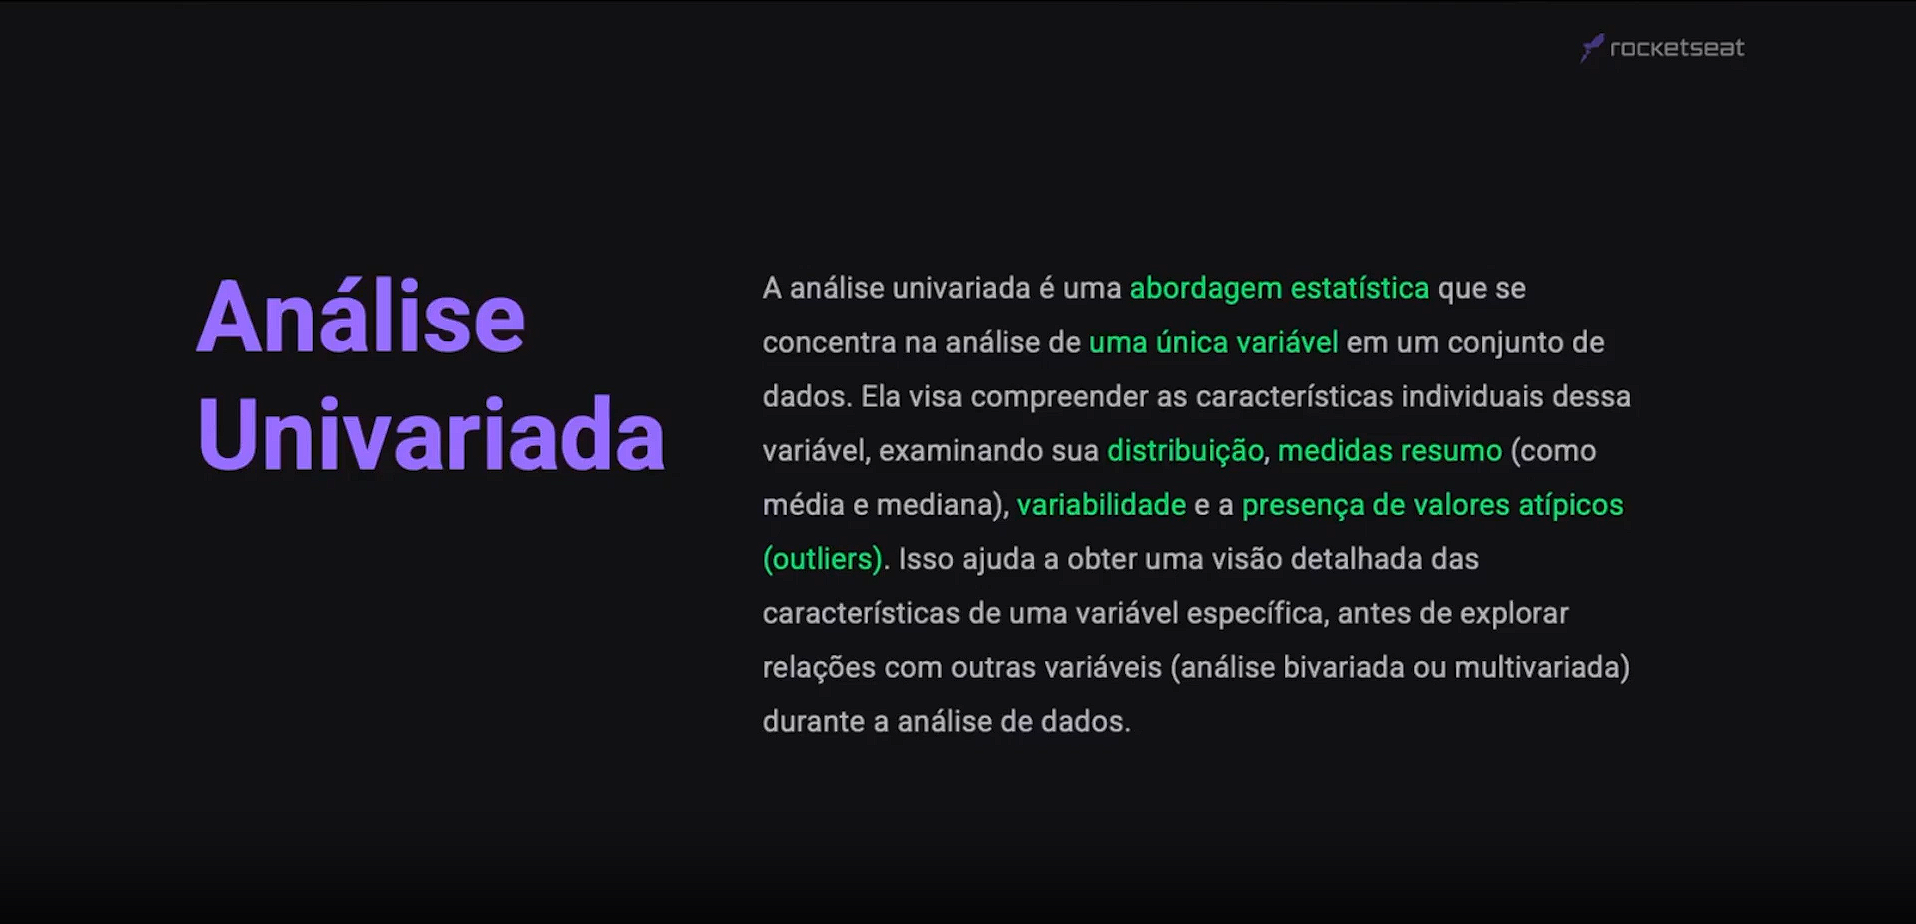

## Análise Univariada 
- A faixa Etaria Cliente tem uma forte associação Churn
- Um cliente com menos de 6 meses de contrato é mais propenso a Churn
- Cliente mensal é mais propenso a Churn

In [40]:
#contar clientes usando a variavel Churn como referencia
df_churn.Churn.value_counts() #value_counts conta a soma de todas os valores

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [41]:
#como ientificar valores possiveis(unicos) numa variavel do DataFrame
df_churn.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [42]:
#Como é a distribuição de Clientes (percentualmente fslanfo) que abandonaram e que continuam ativos
df_churn.Churn.value_counts(normalize=True) #normalize apresenta a porcentagem dos valores de cada 
#73% No e 26% Yes

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

[Text(0, 0, '5174'), Text(0, 0, '1869')]

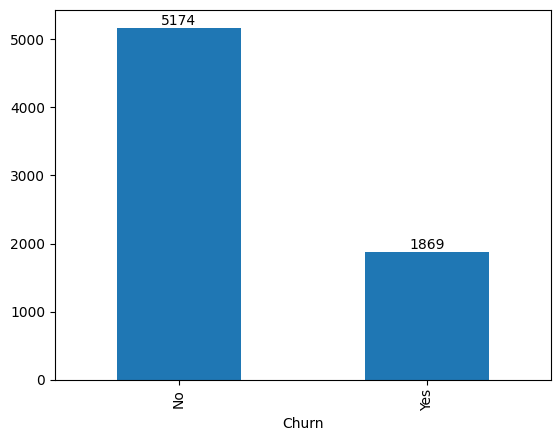

In [43]:
#plot distribuição Churn(Quantidade)
ax = df_churn.Churn.value_counts().plot.bar() #usando matplotlib acoplando as funções que restrigem o que necessito
#salvando para usar metodo de labels
ax.bar_label(ax.containers[0]) 

[Text(0, 0, '0.73463'), Text(0, 0, '0.26537')]

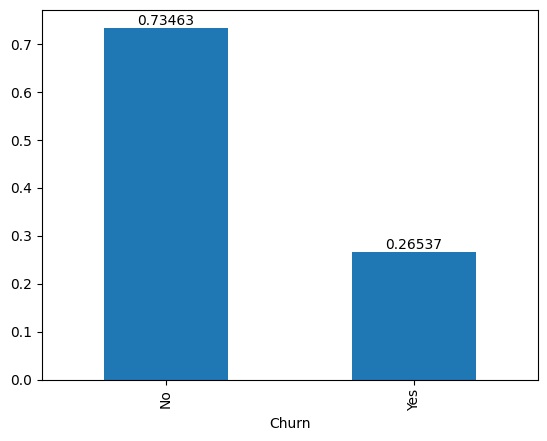

In [44]:
#plot distribuição Churn (Porcentagem)
bx = df_churn.Churn.value_counts(normalize=True).plot.bar()
bx.bar_label(bx.containers[0])

In [45]:
df_churn.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [46]:
df_churn.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [47]:
df_churn.Contract.value_counts(normalize=True)

Contract
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64

[Text(0, 0, '3875'), Text(0, 0, '1695'), Text(0, 0, '1473')]

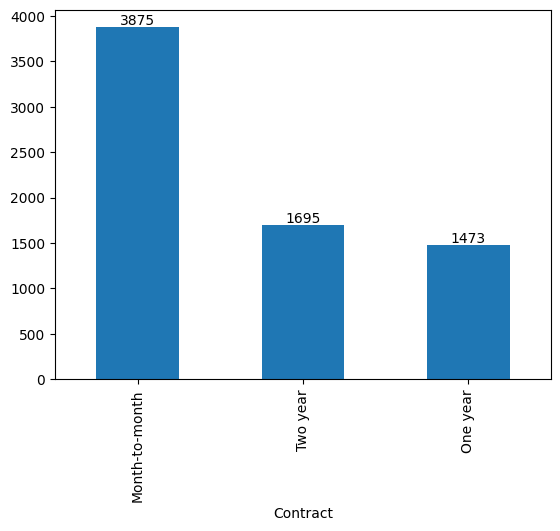

In [48]:
#plot distribuição Constracts (Quantidade)
ax = df_churn.Contract.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.550192'), Text(0, 0, '0.240664'), Text(0, 0, '0.209144')]

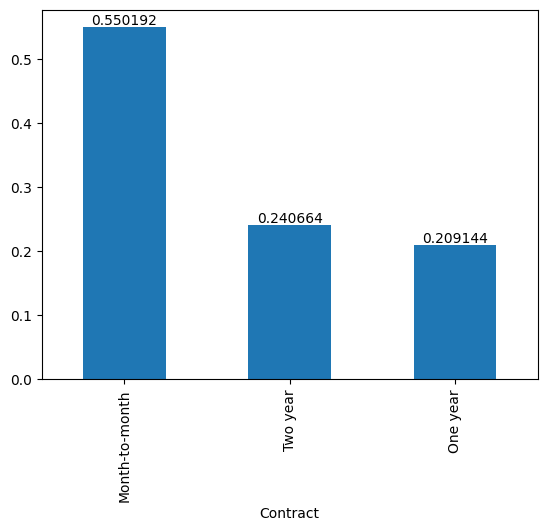

In [49]:
#plot distribuição Constracts (Porcentagem)
ax = df_churn.Contract.value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0])

## Analisando Tenure para ver relação dos tempos de Contrato

In [50]:
#listando todos os valores unicos de tenure(tempo de contrato)
df_churn.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [51]:
#listando porcentagens
df_churn.tenure.value_counts(normalize=True)

tenure
1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
        ...   
28    0.008093
39    0.007951
44    0.007241
36    0.007099
0     0.001562
Name: proportion, Length: 73, dtype: float64

In [52]:
#media de tenure 32.37 meses
df_churn.tenure.mean()

np.float64(32.37114865824223)

In [53]:
#descrevendo principais dados
df_churn.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

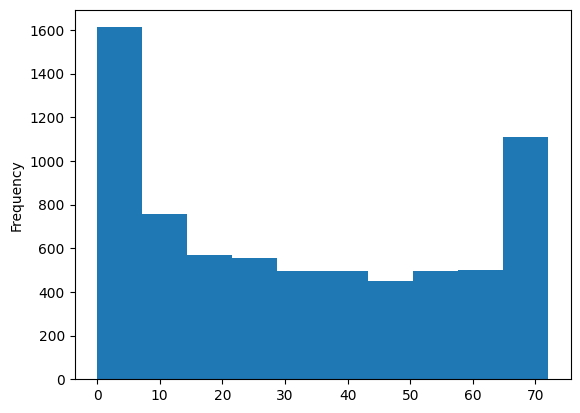

In [54]:
#plotando historgrama ppra analisar tempo de contrato
a = df_churn.tenure.plot.hist()

A variavel Tempo de Contrato (Tenure) não apresenta visualmente uma distribuição normal
A grande parte dos valores se concentram nos extremos, ou seja, contrato com poucoas meses de ativação e contratos longos, acima aproximadamente dos 5 meses.

<Axes: ylabel='Frequency'>

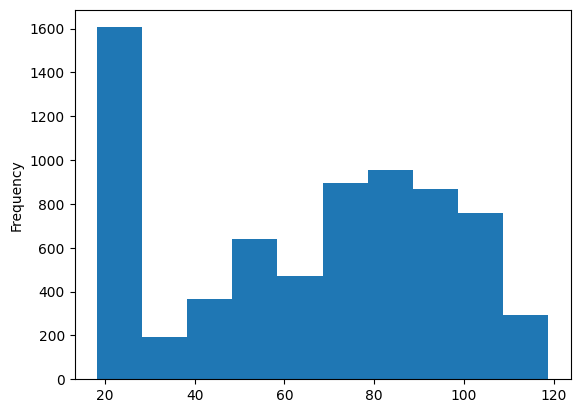

In [55]:
df_churn.MonthlyCharges.plot.hist()

## Medidas de Posição

In [56]:
#Media Tempo de Contrato

df_churn.tenure.mean()

np.float64(32.37114865824223)

In [57]:
#Mediana
df_churn.tenure.median()

np.float64(29.0)

In [58]:
#Moda
df_churn.tenure.mode()

0    1
Name: tenure, dtype: int64

In [59]:
#describe
df_churn.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

## Medidas de Dispersão

In [60]:
#Desvio Padrão Tempo de contrato 
# O desvio padrao mostra em quanto se varia os valores pra cima e pra baixo em relação a media
df_churn.tenure.std()


np.float64(24.55948102309446)

In [61]:
# Coeficiente de Variação
# A variavel varia em 75%
df_churn.tenure.std() / df_churn.tenure.mean() * 100

np.float64(75.86842617906674)

## Filtrando Valores Especificos nas variaveis 

In [62]:
#Quantos clientes de 1 mes de contrato - Filtro
len(df_churn[(df_churn.tenure==1)]) #df_churn[(df_churn.tenure==1)] filtra o valor com o ==

613

In [63]:
#Quanto os clientes de 1 mes de contrato represetam percentualmente
len(df_churn[(df_churn.tenure == 1)]) / len(df_churn) * 100

8.70367741019452